In [5]:
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
plt.rc('font', family='Malgun Gothic')

import pandas as pd
data=pd.read_excel('data/네이버보고서.xls', header=1)
data.head()

,광고그룹,키워드,노출수,클릭수,클릭률(%),"평균클릭비용(VAT포함,원)","총비용(VAT포함,원)"
0,올인원 패키지 : 디자인 툴_파워컨텐츠_포토샵,-,2319456,9606.0,0.414149,261.549448,2512444
1,올인원 패키지 : 업무자동화_VBA,-,767491,8058.0,1.049915,295.974808,2384965
2,ㅍAOP 전체_중복키워드_디자인(삭제),일러스트,1137840,324.0,0.028475,4841.663580,1568699
3,올인원 패키지 : 데이터 분석 입문 온라인_파콘,-,694106,1863.6,0.268489,630.593475,1175174
4,3. html,HTML,9626374,813.6,0.008452,1408.435349,1145903


In [9]:
# 결측치 확인(열단위)
data.isnull().sum()

광고그룹               0
키워드                0
노출수                0
클릭수                0
클릭률(%)             0
평균클릭비용(VAT포함,원)    0
총비용(VAT포함,원)       0
dtype: int64

In [10]:
# 결측치 확인(행단위)
data.isnull().sum(axis=1)

0       0
1       0
2       0
3       0
4       0
       ..
1376    0
1377    0
1378    0
1379    0
1380    0
Length: 1381, dtype: int64

In [18]:
# 데이터프레임의 열 단위 수치연산 및 데이터 타입 다루기
# 클릭수 열에 round 함수 & 정수 단위 적용
data['클릭수']=round(data.클릭수,0).astype(int)
data.head()

,광고그룹,키워드,노출수,클릭수,클릭률(%),"평균클릭비용(VAT포함,원)","총비용(VAT포함,원)"
0,올인원 패키지 : 디자인 툴_파워컨텐츠_포토샵,-,2319456,9606,0.414149,261.549448,2512444
1,올인원 패키지 : 업무자동화_VBA,-,767491,8058,1.049915,295.974808,2384965
2,ㅍAOP 전체_중복키워드_디자인(삭제),일러스트,1137840,324,0.028475,4841.663580,1568699
3,올인원 패키지 : 데이터 분석 입문 온라인_파콘,-,694106,1864,0.268489,630.593475,1175174
4,3. html,HTML,9626374,814,0.008452,1408.435349,1145903


In [21]:
# 클릭률 :CTR=클릭수/노출수*100
data['클릭률(%)']=data.클릭수/data.노출수*100
data.head()

,광고그룹,키워드,노출수,클릭수,클릭률(%),"평균클릭비용(VAT포함,원)","총비용(VAT포함,원)"
0,올인원 패키지 : 디자인 툴_파워컨텐츠_포토샵,-,2319456,9606,0.414149,261.549448,2512444
1,올인원 패키지 : 업무자동화_VBA,-,767491,8058,1.049915,295.974808,2384965
2,ㅍAOP 전체_중복키워드_디자인(삭제),일러스트,1137840,324,0.028475,4841.663580,1568699
3,올인원 패키지 : 데이터 분석 입문 온라인_파콘,-,694106,1864,0.268547,630.593475,1175174
4,3. html,HTML,9626374,814,0.008456,1408.435349,1145903


In [22]:
# 평균클릭비용
data['평균클릭비용(VAT포함,원)']=round(data['평균클릭비용(VAT포함,원)'],0).astype(int)
data.head()

,광고그룹,키워드,노출수,클릭수,클릭률(%),"평균클릭비용(VAT포함,원)","총비용(VAT포함,원)"
0,올인원 패키지 : 디자인 툴_파워컨텐츠_포토샵,-,2319456,9606,0.414149,262,2512444
1,올인원 패키지 : 업무자동화_VBA,-,767491,8058,1.049915,296,2384965
2,ㅍAOP 전체_중복키워드_디자인(삭제),일러스트,1137840,324,0.028475,4842,1568699
3,올인원 패키지 : 데이터 분석 입문 온라인_파콘,-,694106,1864,0.268547,631,1175174
4,3. html,HTML,9626374,814,0.008456,1408,1145903


<AxesSubplot:>

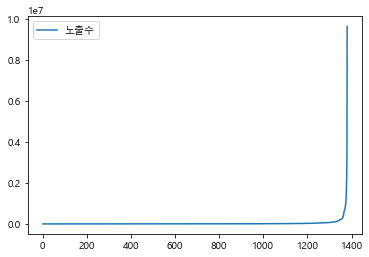

In [32]:
# 노출수 칼럼 시각화
imp_sort=data.노출수.sort_values()
imp_sort=imp_sort.reset_index().drop('index', axis=1)
imp_sort.plot()

<AxesSubplot:>

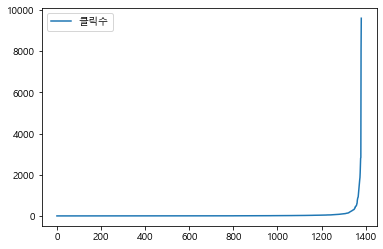

In [37]:
((data['클릭수'].sort_values()).reset_index().drop('index', axis=1)).plot()

<AxesSubplot:>

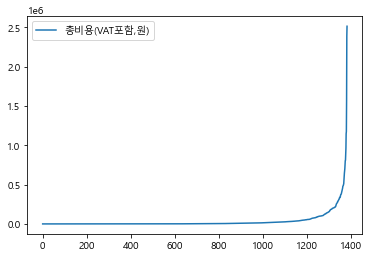

In [38]:
# 총비용칼럼 시각화
((data['총비용(VAT포함,원)'].sort_values()).reset_index().drop('index', axis=1)).plot()

In [45]:
# 노출수, 클릭수 기준 상위 5%에 해당하는 키워드 추출
imp=data.노출수
imp.quantile?

In [42]:
imp.median() # quantile(0.5)

3805.0

In [44]:
imp.min() # quantile(0)

1001

In [46]:
imp.max() # quantile(1)

9626374

In [47]:
imp.quantile(0.95)

82858.0

In [50]:
imp_5=imp[imp>=imp.quantile(0.95)]
imp_5

0      2319456
1       767491
2      1137840
3       694106
4      9626374
        ...   
698     196862
741      94933
763      82858
777     126393
780      90041
Name: 노출수, Length: 70, dtype: int64

In [62]:
keyword_index=data.set_index('키워드')
keyword_index

,광고그룹,노출수,클릭수,클릭률(%),"평균클릭비용(VAT포함,원)","총비용(VAT포함,원)"
키워드,,,,,,
-,올인원 패키지 : 디자인 툴_파워컨텐츠_포토샵,2319456,9606,0.414149,262,2512444
-,올인원 패키지 : 업무자동화_VBA,767491,8058,1.049915,296,2384965
일러스트,ㅍAOP 전체_중복키워드_디자인(삭제),1137840,324,0.028475,4842,1568699
-,올인원 패키지 : 데이터 분석 입문 온라인_파콘,694106,1864,0.268547,631,1175174
HTML,3. html,9626374,814,0.008456,1408,1145903
...,...,...,...,...,...,...
엑셀셀서식,올인원 패키지 : 업무자동화_3. 엑셀,24016,0,0.000000,0,0
MATCH,올인원 패키지 : 업무자동화_3. 엑셀,32287,0,0.000000,0,0
LTV,마케팅KPI수립,32602,0,0.000000,0,0


In [72]:
# 노출수 상위 5% 키워드 추출
imp=keyword_index.노출수
imp=imp[imp>=imp.quantile(0.95)]
imp.index.unique()

Index(['-', '일러스트', 'HTML', '파이썬', '코딩', 'C언어', '가상화폐', '포토샵', '블록체인', '엑셀',
       '영상편집', '컴퓨터활용능력', '컴퓨터활용능력2급', '컴퓨터활용능력1급', '리눅스', '프리미어프로', '스프링',
       '폰트', '마케팅', '스케치', '홍보영상', '인디자인', '영상촬영', '데이터베이스', '글씨체', 'R',
       '프리미어', '한글폰트', '마블', '바이럴마케팅', '경영', '컴공', '창고매매', '일러스트레이터', '논문',
       '엑셀함수', '광고', '운영체제', 'UI', 'SNS마케팅', '소프트웨어', '유닉스', '우분투', '유튜브채널',
       'IOS', '안드로이드', '펀드', '유행어', '부동산스터디', '가상메모리', '프로모션', '앱스토어', 'OS'],
      dtype='object', name='키워드')

In [71]:
# 클릭수 상위 5% 키워드 추출
clk=keyword_index.클릭수
clk=clk[clk>=clk.quantile(0.95)]
clk.index.unique()

Index(['-', '일러스트', 'HTML', '파이썬', '코딩', 'C언어', '가상화폐', '포토샵', '마케팅교육',
       '인스타팔로워늘리기', '블록체인', '엑셀', '엑셀배우기', '엑셀자격증', '인터넷쇼핑몰창업', '파이썬인강',
       '코딩인강', '영상편집', '컴퓨터활용능력', '인스타팔로워', '포토샵배우기', '이더리움', '머신러닝',
       '컴퓨터활용능력2급', '프로그래밍인강', '컴퓨터활용능력1급', '컴퓨터자격증종류', '프리미어프로', '일러스트레이터',
       '경매', '폰트', '스케치', '컴퓨터자격증', '포토샵자격증', '엑셀학원', '재테크', 'MOS자격증', '컴활1급',
       '에프터이펙트', '포토샵학원', '글씨체', '마케팅자격증', '컴활1급실기', '주식', '컴활2급실기', '컴활',
       '컴활2급', '한글폰트', '마블', '바이럴마케팅', '영상편집자격증', '인디자인', '포토샵강좌', '펀드', '투자',
       '일러스트레이터강좌', '재태크', '모스자격증', '펀드하는법', '채권투자', '주식투자하는법'],
      dtype='object', name='키워드')

In [68]:
# 노출수, 클릭수 상위 5% 키워드 추출
result=keyword_index[(keyword_index.클릭수>=keyword_index.클릭수.quantile(0.95))&
             (keyword_index.노출수>=keyword_index.노출수.quantile(0.95))]
result.index.unique()

Index(['-', '일러스트', 'HTML', '파이썬', '코딩', 'C언어', '가상화폐', '포토샵', '블록체인', '엑셀',
       '컴퓨터활용능력', '컴퓨터활용능력2급', '컴퓨터활용능력1급', '프리미어프로', '폰트', '스케치', '글씨체',
       '한글폰트', '마블', '바이럴마케팅'],
      dtype='object', name='키워드')

In [73]:
# 노출수, 클릭수 하위 95%, 비용 상위 5%
imp=keyword_index.노출수
clk=keyword_index.클릭수
cost=keyword_index['총비용(VAT포함,원)']

In [76]:
result=keyword_index[(imp<imp.quantile(0.95))&
                    (clk<clk.quantile(0.95))&
                    (cost>cost.quantile(0.95))]
result.index.unique()

Index(['파이썬교육', '어플개발', 'UIUX디자인', '앱개발', '어플제작', '앱제작', '자바스크립트', '게임학원',
       '영상제작', 'SNS마케팅교육', '데이터사이언스', '파이썬강좌', '구글광고', '마케팅교육', '어플만들기',
       '업무자동화', '브랜딩', '상세페이지제작', '포토샵강좌', '코딩프로그램', '자료구조', '브랜드네이밍',
       '인터넷쇼핑몰창업', '온라인쇼핑몰창업', '엑셀강의', '온라인마케팅교육'],
      dtype='object', name='키워드')

In [79]:
#광고그룹 기준 분석
grouped=data.groupby('광고그룹')

In [82]:
# 각 광고그룹 데이터의 개수
grouped.count()

,키워드,노출수,클릭수,클릭률(%),"평균클릭비용(VAT포함,원)","총비용(VAT포함,원)"
광고그룹,,,,,,
#000_마케팅 전체_main,48,48,48,48,48,48
001.BASIC DESIGN,9,9,9,9,9,9
001.데이터분석/ 통계,10,10,10,10,10,10
002.R,9,9,9,9,9,9
002.UX/UI,5,5,5,5,5,5
...,...,...,...,...,...,...
포토샵 유치원_일러스트레이터 유치원,13,13,13,13,13,13
프로그래밍 유치원,8,8,8,8,8,8
프로그래밍 전체,12,12,12,12,12,12


In [83]:
# 각 광고그룹 데이터의 평균
grouped.mean()

,노출수,클릭수,클릭률(%),"평균클릭비용(VAT포함,원)","총비용(VAT포함,원)"
광고그룹,,,,,
#000_마케팅 전체_main,14780.145833,8.354167,0.183923,625.062500,7243.958333
001.BASIC DESIGN,5738.555556,6.666667,0.226453,298.666667,2427.333333
001.데이터분석/ 통계,3715.000000,20.200000,0.889107,1021.700000,19575.600000
002.R,13413.777778,8.666667,0.114900,360.000000,4796.000000
002.UX/UI,3090.800000,4.000000,0.083684,70.000000,550.000000
...,...,...,...,...,...
포토샵 유치원_일러스트레이터 유치원,72092.692308,16.769231,0.053070,648.384615,15781.615385
프로그래밍 유치원,5921.625000,7.750000,0.230167,2032.500000,23617.000000
프로그래밍 전체,90375.000000,9.166667,0.021747,123.916667,1626.166667


In [84]:
# 각 광고그룹의 중앙값
grouped.median()

,노출수,클릭수,클릭률(%),"평균클릭비용(VAT포함,원)","총비용(VAT포함,원)"
광고그룹,,,,,
#000_마케팅 전체_main,2765.0,4.0,0.051207,766.0,2458.5
001.BASIC DESIGN,5524.0,2.0,0.032263,358.0,1023.0
001.데이터분석/ 통계,1813.0,13.5,0.572299,1097.0,13464.0
002.R,5184.0,4.0,0.031128,119.0,1287.0
002.UX/UI,2649.0,1.0,0.075500,73.0,88.0
...,...,...,...,...,...
포토샵 유치원_일러스트레이터 유치원,5763.0,4.0,0.022753,853.0,2706.0
프로그래밍 유치원,3748.0,3.0,0.111496,1764.0,8002.5
프로그래밍 전체,3455.5,1.0,0.008557,130.5,225.5


In [85]:
# 각 광고그룹의 분산
grouped.var()

,노출수,클릭수,클릭률(%),"평균클릭비용(VAT포함,원)","총비용(VAT포함,원)"
광고그룹,,,,,
#000_마케팅 전체_main,1.891825e+09,313.382535,0.101000,2.235473e+05,2.513719e+08
001.BASIC DESIGN,1.749434e+07,82.750000,0.214819,3.104400e+04,1.036867e+07
001.데이터분석/ 통계,1.689076e+07,335.066667,0.677362,7.278379e+04,3.658572e+08
002.R,3.737892e+08,217.750000,0.029321,1.382262e+05,1.015579e+08
002.UX/UI,3.986603e+06,53.500000,0.011435,4.798500e+03,1.010592e+06
...,...,...,...,...,...
포토샵 유치원_일러스트레이터 유치원,3.543715e+10,1251.858974,0.004283,2.217493e+05,1.409525e+09
프로그래밍 유치원,4.412070e+07,97.357143,0.069556,2.720995e+06,1.375588e+09
프로그래밍 전체,4.015421e+10,297.787879,0.000918,1.441081e+04,7.849530e+06


In [98]:
# 광고그룹 기준 데이터 전처리
grouped.sum()

,노출수,클릭수,클릭률(%),"평균클릭비용(VAT포함,원)","총비용(VAT포함,원)"
광고그룹,,,,,
#000_마케팅 전체_main,709447,401,8.828310,30003,347710
001.BASIC DESIGN,51647,60,2.038075,2688,21846
001.데이터분석/ 통계,37150,202,8.891065,10217,195756
002.R,120724,78,1.034098,3240,43164
002.UX/UI,15454,20,0.418420,350,2750
...,...,...,...,...,...
포토샵 유치원_일러스트레이터 유치원,937205,218,0.689911,8429,205161
프로그래밍 유치원,47373,62,1.841340,16260,188936
프로그래밍 전체,1084500,110,0.260968,1487,19514


In [106]:
data_group=grouped.sum()

# 클릭률 = 클릭수 / 노출수*100
data_group['클릭률(%)']=data_group.클릭수/data_group.노출수*100

# 평균 클릭비용=총비용/클릭수
data_group['평균클릭비용(VAT포함,원)']=data_group['총비용(VAT포함,원)']/data_group['클릭수']

# 평균 클리비용 결측값 대체 & 정수 형태
data_group['평균클릭비용(VAT포함,원)']=round(data_group['평균클릭비용(VAT포함,원)'].fillna(0), 0).astype(int)

In [107]:
data_group

,노출수,클릭수,클릭률(%),"평균클릭비용(VAT포함,원)","총비용(VAT포함,원)"
광고그룹,,,,,
#000_마케팅 전체_main,709447,401,0.056523,867,347710
001.BASIC DESIGN,51647,60,0.116173,364,21846
001.데이터분석/ 통계,37150,202,0.543742,969,195756
002.R,120724,78,0.064610,553,43164
002.UX/UI,15454,20,0.129416,138,2750
...,...,...,...,...,...
포토샵 유치원_일러스트레이터 유치원,937205,218,0.023261,941,205161
프로그래밍 유치원,47373,62,0.130876,3047,188936
프로그래밍 전체,1084500,110,0.010143,177,19514


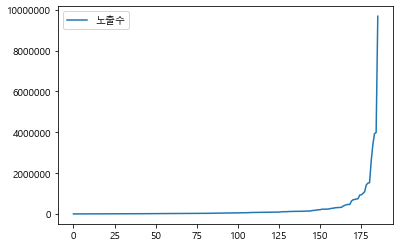

In [132]:
# 노출수 칼럼 선그래프
(data_group.노출수.sort_values()).reset_index().drop('광고그룹', axis=1).plot()
plt.ticklabel_format(axis='y', style='plain')

<AxesSubplot:>

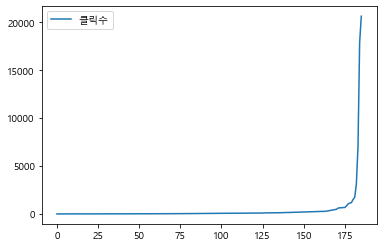

In [115]:
# 클릭수 칼럼 선그래프
(data_group.클릭수.sort_values()).reset_index().drop('광고그룹', axis=1).plot()

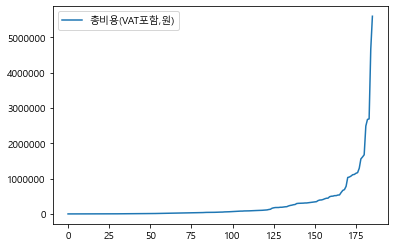

In [131]:
# 총비용 칼럼 선그래프
(data_group['총비용(VAT포함,원)'].sort_values()).reset_index().drop('광고그룹', axis=1).plot()
plt.ticklabel_format(axis='y',style='plain')

In [135]:
# 중점관리 광고그룹 : 노출수 상위 20%, 클릭수 상위 10%
imp=data_group.노출수
clk=data_group.클릭수
result=data_group[(imp>=imp.quantile(0.8))&
                 (clk>=clk.quantile(0.9))]
result.index

Index(['#000_마케팅 전체_main', '1. 코딩', '3. html', '6. 파이썬', 'AOP 전체_중복키워드_디자인',
       'AOP 전체_중복키워드_비지니스', 'ㅍAOP 전체_중복키워드_디자인(삭제)', '마케팅 전체',
       '올인원 패키지 : 데이터 분석 입문 온라인_파콘', '올인원 패키지 : 디자인 툴_파워컨텐츠_포토샵',
       '올인원 패키지 : 업무자동화_VBA', '타이포그래피와 편집디자인', '프로그래밍 전체_파워컨텐츠_블록체인(삭제)'],
      dtype='object', name='광고그룹')

In [137]:
# 저효율 광고그룹 : 노출수 하위 80%, 클릭수 하위 90%, 총비용 하위 60%~90%
cost=data_group['총비용(VAT포함,원)']
result=data_group[(imp<imp.quantile(0.8))&
                 (clk<clk.quantile(0.9))&
                 (cost>cost.quantile(0.6))*(cost<cost.quantile(0.9))]
result.index

Index(['001.데이터분석/ 통계', '002.마케팅 입문', '003.퍼포먼스 마케팅', '1. 전체', '2. 프로그래밍',
       '5. 자료구조', 'AOP 전체_중복키워드_공통', 'AOP 전체_중복키워드_데이터사이언스',
       'AOP 전체_중복키워드_프로그래밍', 'JavaScript BOOT CAMP',
       'Python & Django를 활용한 웹 서비스_개발자', 'SEO/SEM 전략',
       'TensorFlow로 시작하는 딥러닝 입문', 'fin_camp_auction_6', 'ㅍAOP 전체_중복키워드_공통(삭제)',
       'ㅍAOP 전체_중복키워드_마케팅(삭제)', 'ㅍAOP 전체_중복키워드_프로그래밍(삭제)',
       'ㅍ올인원 패키지 : UX/UI 디자인 입문_연관검색어(삭제)', 'ㅍ올인원 패키지 : 브랜딩',
       '고객의 마음을 읽는 구글애널리틱스', '대기업을 이기는 브랜딩 전략', '마케터를 위한 데이터 부트캠프',
       '마케터를 위한 데이터 해석 실전', '마케팅 유치원', '마케팅KPI수립',
       '올인원 패키지 : 1인 쇼핑몰 시작하기_02.쇼핑몰구축', '올인원 패키지 : 1인 쇼핑몰_00.창업_MO',
       '올인원 패키지 : UX/UI 디자인 입문_연관검색어', '올인원 패키지 : 그로스해킹_5.마케팅 분석',
       '올인원 패키지 : 디지털 마케팅_1. 디지털 마케팅', '올인원 패키지 : 브랜딩',
       '올인원 패키지 : 업무자동화_1. 자동화', '올인원 패키지 : 업무자동화_4. VBA',
       '왕초보의 파이썬 웹 프로그래밍 CAMP', '코딩으로 여행하는 블록체인 서비스', '페이스북&인스타그램 마케팅 실전',
       '프로그래밍 유치원'],
      dtype='object', name='광고그룹')